# Diccionario de Datos - Dataset MercadoLibre

## Descripción de Variables

A continuación se presenta una breve descripción de las variables disponibles en el dataset `MLA_100k.jsonlines`.

### Variables Principales

| Variable | Descripción en Español |
|----------|------------------------|
| `seller_address` | Dirección del vendedor |
| `warranty` | Información sobre la garantía del producto |
| `sub_status` | NO CLARO - Parece estar relacionado con cuando una publicación de producto está suspendida (?) |
| `condition` | **[VARIABLE OBJETIVO]** Condición del producto (`new` para nuevo, `used` para usado) |
| `seller_contact` | Información de contacto del vendedor |
| `deal_ids` | Lista de IDs de ofertas relacionadas con el producto |
| `base_price` | Precio base del producto antes de descuentos |
| `shipping` | Información sobre el método de envío |
| `non_mercado_pago_payment_methods` | Métodos de pago que no son Mercado Pago |
| `seller_id` | ID único del vendedor |
| `variations` | Contiene información sobre variaciones del producto (color, talla, etc.) |
| `location` | Información sobre la ubicación del producto o del vendedor |
| `site_id` | Código del sitio donde se está vendiendo el producto (MLA para Argentina, MLB para Brasil, etc.) |
| `listing_type_id` | Tipo de publicación (gold_special, gold_pro, free, etc.) |
| `price` | Precio actual del producto (¿Cuál es la diferencia con base_price?) |
| `attributes` | Atributos del producto (marca, peso, dimensiones, modelo, etc.) |
| `buying_mode` | Modo de compra |
| `tags` | Lista de etiquetas asociadas con el producto |
| `parent_item_id` | ID del producto principal si pertenece a una serie de variantes |
| `coverage_areas` | NO CLARO - Posiblemente áreas de cobertura de envío |
| `category_id` | ID de la categoría del producto |
| `descriptions` | Descripción del producto con alguna característica especial (¿cuál?) |
| `international_delivery_mode` | Envío internacional |
| `pictures` | Lista de imágenes asociadas con el producto |
| `id` | ID único del producto |
| `official_store_id` | ID de la tienda oficial |
| `accepts_mercadopago` | El vendedor acepta Mercado Pago |
| `original_price` | Precio original antes de aplicar descuentos (¿CUÁL ES LA DIFERENCIA con base_price?) |
| `currency_id` | Moneda en la que está listado el precio |
| `thumbnail` | URL de la imagen miniatura del producto |
| `title` | Nombre o título del producto |
| `automatic_relist` | NO CLARO - Posiblemente republicación automática del producto |
| `date_created` | Fecha en que se creó la publicación |
| `stop_time` | Fecha en que se desactiva la publicación |
| `status` | Estado de la publicación |
| `catalog_product_id` | ID del producto en el catálogo de MercadoLibre |
| `initial_quantity` | Cantidad inicial de productos disponibles |
| `sold_quantity` | Número de unidades vendidas |
| `available_quantity` | Número de unidades aún disponibles |

---

## Notas Importantes

### Variables con Ambigüedad

Algunas variables tienen significados que requieren clarificación adicional:

1. **Diferencias de Precio**:
   - `price`: Precio actual mostrado al comprador
   - `base_price`: Precio base antes de descuentos
   - `original_price`: Precio original antes de descuentos


2. **Variables No Claras**:
   - `sub_status`: Posiblemente relacionado con suspensiones de publicaciones
   - `coverage_areas`: Posiblemente áreas geográficas de cobertura de envío
   - `automatic_relist`: Posiblemente indica si la publicación se renueva automáticamente
   - `descriptions`: Estructura exacta y características especiales por determinar

### Variable Objetivo

**`condition`**: Esta es la variable que se desea predecir en el modelo de clasificación.

- Valores posibles: `"new"` (nuevo) o `"used"` (usado)
- Tipo: Categórica binaria
- Importancia: Variable objetivo del modelo de Machine Learning

---

## Campos Anidados Importantes

### `seller_address` (Objeto)

```json
{
  "country": {"id": "AR", "name": "Argentina"},
  "state": {"id": "AR-B", "name": "Buenos Aires"},
  "city": {"id": "TUxBQkNBUzQzMjM", "name": "Capital Federal"}
}
```

**Features derivadas comunes**:
- `seller_country`
- `seller_state`
- `seller_city`

### `shipping` (Objeto)

```json
{
  "mode": "me2",
  "local_pick_up": true,
  "free_shipping": false,
  "tags": ["fulfillment", "mandatory_free_shipping"]
}
```

**Features derivadas comunes**:
- `shipping_mode`
- `shipping_local_pick_up`
- `shipping_free_shipping`
- `shipping_tags` (one-hot encoding)

### `attributes` (Array de Objetos)

```json
[
  {"id": "BRAND", "name": "Marca", "value_name": "Samsung"},
  {"id": "MODEL", "name": "Modelo", "value_name": "Galaxy S21"}
]
```

**Features derivadas comunes**:
- Extracción de marca (`BRAND`)
- Extracción de modelo (`MODEL`)
- Otros atributos según categoría de producto

---

## Referencias

- [Documentación API MercadoLibre](https://developers.mercadolibre.com/)

In [102]:
import pandas as pd
import numpy as np
import os

# Mostrar todas las columnas en los outputs
pd.set_option('display.max_columns', None)

In [103]:
from pathlib import Path

# BASE_DIR apunta a la raíz del repositorio data-projects-lab
# Desde: projects/clasificador-meli/src/notebooks/
# Sube 4 niveles: ../../../../ para llegar a data-projects-lab/
BASE_DIR = Path().resolve().parent.parent.parent.parent

# Dataset principal (316 MB, gestionado con Git LFS)
DATA_PATH = BASE_DIR / 'datasets'
file_name = 'MLA_100k.jsonlines'
file_path = DATA_PATH / file_name

print(f"Cargando dataset desde: {file_path}")
print(f"Existe: {file_path.exists()}")

# Cargo el dataset en un dataframe de pandas
df = pd.read_json(file_path, lines=True)

Cargando dataset desde: /Users/david.palacio/Documents/academia/data-projects-lab/datasets/MLA_100k.jsonlines
Existe: True


In [104]:
# Visualizar primeros 2 registros para entender la estructura
df.head(2)

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,[],{},MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA578052519,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA435206787...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-04 20:42:53+00:00,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,[],{},MLA,silver,2650.0,[],buy_it_now,[],,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA581565358,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA20245018...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-25 18:08:30+00:00,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1


In [105]:
# Información general: tipos de datos, valores no nulos, memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

Algunas columnas son diccionarios o listas. Analicemos qué tipo de valores contienen:
- seller_address
- shipping
- non_mercado_pago_payment_methods
- variations
- location
- attributes
- tags
- coverage_areas
- descriptions
- pictures
- geolocation

In [106]:
import json

pd.set_option('display.max_colwidth', None) # Sin límite de caracteres por columna
pd.set_option('display.max_rows', None)      # Sin límite de filas a mostrar

In [107]:
# Columnas con datos anidados (dicts, listas) que requieren procesamiento especial
columns_dic_list = ['seller_address', 'shipping', 'non_mercado_pago_payment_methods', 
                    'variations', 'location', 'attributes', 'tags', 
                    'coverage_areas', 'descriptions', 'pictures', 'geolocation']

In [108]:
# Inspeccionar contenido de cada columna anidada
for column in columns_dic_list:
    print('-'*80)
    # Tipo de datos
    print(df[column].apply(type).value_counts())  # Tipos de datos
    print(df[column].head(2))  # Primeros valores

--------------------------------------------------------------------------------
seller_address
<class 'dict'>    100000
Name: count, dtype: int64
0    {'comment': '', 'longitude': -58.3986709, 'id': 78162842, 'country': {'name': 'Argentina', 'id': 'AR'}, 'address_line': '', 'latitude': -34.6280698, 'search_location': {'neighborhood': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}, 'state': {'name': 'Capital Federal', 'id': 'TUxBUENBUGw3M2E1'}, 'city': {'name': 'Capital Federal', 'id': 'TUxBQ0NBUGZlZG1sYQ'}}, 'zip_code': '', 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}}
1                     {'comment': '', 'longitude': -58.5059173, 'id': 105272448, 'country': {'name': 'Argentina', 'id': 'AR'}, 'address_line': '', 'latitude': -34.5935524, 'search_location': {'neighborhood': {'name': 'Villa Devoto', 'id': 'TUxBQlZJTDYzNzZa'}, 'state': {'name': 'Capital Federal', 'id': 'TUxBUENBUGw3M2E1'}, 'city': {'name': 'Capital F

In [109]:
# Inspeccionar contenido de cada columna anidada
for column in columns_dic_list:
    print('-'*80)
    print(column)
    # Tipo de datos
    #print(df[column].apply(type).value_counts())  # Tipos de datos
    #print(df[column].head(2))  # Primeros valores

    # Mostrar JSON formateado
    for value in df[df[column].notna()][column].head(2):
        print(json.dumps(value, indent=2, ensure_ascii=False))  # Formateado JSON legible

--------------------------------------------------------------------------------
seller_address
{
  "comment": "",
  "longitude": -58.3986709,
  "id": 78162842,
  "country": {
    "name": "Argentina",
    "id": "AR"
  },
  "address_line": "",
  "latitude": -34.6280698,
  "search_location": {
    "neighborhood": {
      "name": "San Cristóbal",
      "id": "TUxBQlNBTjkwNTZa"
    },
    "state": {
      "name": "Capital Federal",
      "id": "TUxBUENBUGw3M2E1"
    },
    "city": {
      "name": "Capital Federal",
      "id": "TUxBQ0NBUGZlZG1sYQ"
    }
  },
  "zip_code": "",
  "city": {
    "name": "San Cristóbal",
    "id": "TUxBQlNBTjkwNTZa"
  },
  "state": {
    "name": "Capital Federal",
    "id": "AR-C"
  }
}
{
  "comment": "",
  "longitude": -58.5059173,
  "id": 105272448,
  "country": {
    "name": "Argentina",
    "id": "AR"
  },
  "address_line": "",
  "latitude": -34.5935524,
  "search_location": {
    "neighborhood": {
      "name": "Villa Devoto",
      "id": "TUxBQlZJTDYzNzZa

Parece que tenemos información sobre ubicación, país, ciudad y estado en `seller_address`.

En `shipping` encontramos información sobre `local_pick_up`, `mode` (tipo de envío) y `free_shipping`.

En `non_mercado_pago_payment_methods` tenemos información sobre los diferentes métodos de pago que no fueron realizados a través de Mercado Pago. Aquí podemos ver transferencias bancarias, efectivo o acordar con el comprador.

In [110]:
def analizar_valores_faltantes(df):
    """
    Analiza y muestra las columnas con valores faltantes en un DataFrame.
    
    Args:
        df (DataFrame): DataFrame a analizar
    
    Returns:
        DataFrame: Tabla con columnas que tienen valores faltantes y sus porcentajes
    """
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)

    print(f"Shape: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"Columnas con valores faltantes: {(missing > 0).sum()}\n")

    return pd.DataFrame({
        'Missing': missing[missing > 0],
        '% Missing': missing_pct[missing > 0]
    }).sort_values('% Missing', ascending=False)

# Uso:
analizar_valores_faltantes(df)

Shape: 100000 filas × 48 columnas
Columnas con valores faltantes: 9



,Missing,% Missing
differential_pricing,100000,100.00
subtitle,100000,100.00
catalog_product_id,99989,99.99
original_price,99857,99.86
official_store_id,99182,99.18
seller_contact,97781,97.78
video_id,97015,97.02
warranty,60896,60.90
parent_item_id,23011,23.01


Extraigamos la información anidada de los diccionarios

In [111]:
df.shape

(100000, 48)

In [112]:
# seller_address
seller_cols = pd.json_normalize(df['seller_address'])
df['seller_country'] = seller_cols['country.name']
df['seller_state'] = seller_cols['state.name']
df['seller_city'] = seller_cols['city.name']

# shipping
shipping_cols = pd.json_normalize(df['shipping'])
df['shipping_local_pick_up'] = shipping_cols['local_pick_up']
df['shipping_free_shipping'] = shipping_cols['free_shipping']
df['shipping_mode'] = shipping_cols['mode']
df['shipping_tags'] = shipping_cols['tags']

In [113]:
df.shape

(100000, 55)

In [114]:
df.head(1)

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity,seller_country,seller_state,seller_city,shipping_local_pick_up,shipping_free_shipping,shipping_mode,shipping_tags
0,"{'comment': '', 'longitude': -58.3986709, 'id': 78162842, 'country': {'name': 'Argentina', 'id': 'AR'}, 'address_line': '', 'latitude': -34.6280698, 'search_location': {'neighborhood': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}, 'state': {'name': 'Capital Federal', 'id': 'TUxBUENBUGw3M2E1'}, 'city': {'name': 'Capital Federal', 'id': 'TUxBQ0NBUGZlZG1sYQ'}}, 'zip_code': '', 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}}",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'not_specified', 'dimensions': None}","[{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}]",74952096,[],{},MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-O.jpg', 'quality': '', 'id': '5386-MLA4352067878_052013'}, {'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/5361-MLA4352068035_052013-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s1-p.mlstatic.com/5361-MLA4352068035_052013-O.jpg', 'quality': '', 'id': '5361-MLA4352068035_052013'}]",MLA578052519,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-I.jpg,Auriculares Samsung Originales Manos Libres Cable Usb Oferta,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-I.jpg,2015-11-04 20:42:53+00:00,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052519-auriculares-samsung-originales-manos-libres-cable-usb-oferta-_JM,"{'latitude': -34.6280698, 'longitude': -58.3986709}",0,1,Argentina,Capital Federal,San Cristóbal,True,False,not_specified,[]


Ahora vamos a transformar la columna `non_mercado_pago_payment_methods`. Se deben convertir los valores a minúscula y remover los acentos. Luego se crearán columnas booleanas para cada método de pago.

In [115]:
from sklearn.preprocessing import MultiLabelBinarizer
import re
import unicodedata

def clean_column_name(name):
    """Normaliza nombres para usar como columnas de DataFrame."""
    name = name.lower().strip()  # Minúsculas
    name = unicodedata.normalize("NFKD", name).encode("ASCII", "ignore").decode("utf-8")  # Sin tildes
    name = re.sub(r"\s+", "_", name)  # Espacios → guiones bajos
    return name

# Extraer decripciones de métodos de pago

payment_methods = df['non_mercado_pago_payment_methods'].apply(
    lambda x: [clean_column_name(p['description']) for p in x] if isinstance(x, list) else []
)

# Multilable encoding

mlb = MultiLabelBinarizer()
payment_encoded = pd.DataFrame(
    mlb.fit_transform(payment_methods),
    columns=mlb.classes_,
    index=df.index
)

df = pd.concat([df, payment_encoded], axis=1)

In [116]:
df.shape

(100000, 69)

In [117]:
# Alternativa más legible para extraer descripciones de métodos de pago

# def extract_payment_descriptions(payment_list):
#     """Extrae y limpia descripciones de métodos de pago"""
#     if not isinstance(payment_list, list):
#         return []

#     clean_names = []
#     for payment in payment_list:
#         clean_name = clean_column_name(payment['description'])
#         clean_names.append(clean_name)

#     return clean_names

# payment_methods = df['non_mercado_pago_payment_methods'].apply(extract_payment_descriptions)

In [118]:
df.head(1)

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity,seller_country,seller_state,seller_city,shipping_local_pick_up,shipping_free_shipping,shipping_mode,shipping_tags,acordar_con_el_comprador,american_express,cheque_certificado,contra_reembolso,diners,efectivo,giro_postal,mastercard,mastercard_maestro,mercadopago,tarjeta_de_credito,transferencia_bancaria,visa,visa_electron
0,"{'comment': '', 'longitude': -58.3986709, 'id': 78162842, 'country': {'name': 'Argentina', 'id': 'AR'}, 'address_line': '', 'latitude': -34.6280698, 'search_location': {'neighborhood': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}, 'state': {'name': 'Capital Federal', 'id': 'TUxBUENBUGw3M2E1'}, 'city': {'name': 'Capital Federal', 'id': 'TUxBQ0NBUGZlZG1sYQ'}}, 'zip_code': '', 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}}",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'not_specified', 'dimensions': None}","[{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}]",74952096,[],{},MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-O.jpg', 'quality': '', 'id': '5386-MLA4352067878_052013'}, {'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/5361-MLA4352068035_052013-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s1-p.mlstatic.com/5361-MLA4352068035_052013-O.jpg', 'quality': '', 'id': '5361-MLA4352068035_052013'}]",MLA578052519,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-I.jpg,Auriculares Samsung Originales Manos Libres Cable Usb Oferta,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-I.jpg,2015-11-04 20:42:53+00:00,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052519-auriculares-samsung-originales-manos-libres-cable-usb-oferta-_JM,"{'latitude': -34.6280698, 'longitude': -58.3986709}",0,1,Argentina,Capital Federal,San Cristóbal,True,False,not_specified,[],1,0,0,0,0,1,0,0,0,0,0,1,0,0


Ahora analicemos la columna `tag`

In [119]:
df.tags.value_counts()

tags
[dragged_bids_and_visits]                            72551
[]                                                   24910
[good_quality_thumbnail, dragged_bids_and_visits]     1330
[dragged_visits]                                       516
[good_quality_thumbnail]                               392
[dragged_visits, free_relist]                          285
[poor_quality_thumbnail, dragged_bids_and_visits]       11
[poor_quality_thumbnail]                                 5
Name: count, dtype: int64

We will build the columns with these values ​​and create numeric variables with these values. For this we will use dummies.

In [120]:
# Manejar valores nulos y no-listas

print(df.shape)

tags_clean = df['tags'].apply(lambda x: x if isinstance(x, list) else []) # Para evitar fallos en MultiLabelBinarizer

mlb = MultiLabelBinarizer()
tags_encoded = pd.DataFrame(
    mlb.fit_transform(tags_clean),
    columns=mlb.classes_,
    index=df.index
)

df = pd.concat([df, tags_encoded], axis=1)

print(df.shape)

(100000, 69)
(100000, 74)


In [121]:
df.head(1)

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity,seller_country,seller_state,seller_city,shipping_local_pick_up,shipping_free_shipping,shipping_mode,shipping_tags,acordar_con_el_comprador,american_express,cheque_certificado,contra_reembolso,diners,efectivo,giro_postal,mastercard,mastercard_maestro,mercadopago,tarjeta_de_credito,transferencia_bancaria,visa,visa_electron,dragged_bids_and_visits,dragged_visits,free_relist,good_quality_thumbnail,poor_quality_thumbnail
0,"{'comment': '', 'longitude': -58.3986709, 'id': 78162842, 'country': {'name': 'Argentina', 'id': 'AR'}, 'address_line': '', 'latitude': -34.6280698, 'search_location': {'neighborhood': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}, 'state': {'name': 'Capital Federal', 'id': 'TUxBUENBUGw3M2E1'}, 'city': {'name': 'Capital Federal', 'id': 'TUxBQ0NBUGZlZG1sYQ'}}, 'zip_code': '', 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}}",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'not_specified', 'dimensions': None}","[{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}]",74952096,[],{},MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-O.jpg', 'quality': '', 'id': '5386-MLA4352067878_052013'}, {'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/5361-MLA4352068035_052013-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s1-p.mlstatic.com/5361-MLA4352068035_052013-O.jpg', 'quality': '', 'id': '5361-MLA4352068035_052013'}]",MLA578052519,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-I.jpg,Auriculares Samsung Originales Manos Libres Cable Usb Oferta,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.com/5386-MLA4352067878_052013-I.jpg,2015-11-04 20:42:53+00:00,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052519-auriculares-samsung-originales-manos-libres-cable-usb-oferta-_JM,"{'latitude': -34.6280698, 'longitude': -58.3986709}",0,1,Argentina,Capital Federal,San Cristóbal,True,False,not_specified,[],1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


Analicemos la columna `variations`

In [122]:
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

df['variations'].value_counts()

variations
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Podría ser útil, pero casi todos sus valores están vacíos, entonces mejor no se trabajará con esta variable.

In [123]:
df.warranty.value_counts()

warranty
Sí                                                                       5682
Sin garantía                                                             5442
SI                                                                        592
6 meses                                                                   547
6 MESES                                                                   397
                                                                         ... 
Garantía de un año a partir de la fecha de entrega!                         1
Garantía 1 año. La misma no incluye daños por mal uso o accidentales.       1
SE PRUEBAN LOS JUEGOS AL RETIRAR                                            1
Mi garantía son los comentarios de mis compradores.                         1
Pueden variar matasellos                                                    1
Name: count, Length: 10264, dtype: int64

Para la variable 'garantia' (warranty), podemos observar que hay una descripción que indica si el producto tiene garantía o no. Se ha creado una función para intentar normalizar esta variable y determinar en qué casos la garantía aplica o no aplica. Se han utilizado expresiones regulares para determinar la aplicabilidad. En algunos casos, dice '6 meses', '1 año', 'sí', 'no aplica', 'por defecto', etc. (Se podrían emplear métodos más sofisticados). En algunos casos, es desconocido (por ejemplo: NUESTRA REPUTACION), y estos se han marcado como indeterminado.

In [124]:
def normalizar_texto(texto):
    """
    Normaliza texto: elimina tildes, convierte a minúsculas y remueve caracteres especiales.
    
    Ejemplo:
        "Garantía de 6 meses!" -> "garantia de 6 meses"
    """
    if isinstance(texto, str):  # Verifica que sea un string
        texto = texto.lower()  # Convierte a minúsculas: "GARANTÍA" -> "garantía"

        # Elimina tildes: descompone caracteres y quita marcas diacríticas
        texto = ''.join(c for c in unicodedata.normalize('NFD', texto)
                        if unicodedata.category(c) != 'Mn')

        # Elimina caracteres especiales (mantiene solo letras, números y espacios)
        texto = re.sub(r'[^\w\s]', '', texto)  # "garantía!" -> "garantia"

    return texto


# ============================================================================
# PATRONES Y PALABRAS CLAVE
# ============================================================================

# Expresión regular que detecta periodos de tiempo
# Busca: número + unidad de tiempo (6 meses, 1 año, 30 días, etc.)
patron_tiempo = re.compile(r'(\d+)\s*(dias|día|mes|meses|año|años|semanas|semana|ano)', re.IGNORECASE)

# Palabras que indican que la garantía SÍ aplica
keywords_aplica = [
    "garantia", "cubre", "respaldado", "siempre que", "proteccion",
    "defectos de fabricacion", "aplica", "si", "garantizado",
    "por fallas", "fabricacion", "defecto"
]

# Palabras que indican que la garantía NO aplica
# IMPORTANTE: incluye "no" y "sin" para capturar frases como "no tiene garantía"
keywords_no_aplica = [
    "no", "desconocido", "no aplica", "sin garantia",
    "no se aceptan devoluciones", "sin", "no cubre",
    "no garantia", "no respaldado", "no proteccion",
    "no defectos de fabricacion", "no aplica",
    "no garantizado", "no por fallas", "no fabricacion", "no defecto"
]


# ============================================================================
# FUNCIÓN DE CLASIFICACIÓN
# ============================================================================

def clasificar_garantia_mejorado(texto):
    """
    Clasifica el texto de garantía en 3 categorías: aplica, no_aplica, indeterminado.
    
    Lógica de clasificación (en orden):
        1. Si menciona "sí" explícitamente -> aplica
        2. Si menciona periodo de tiempo (6 meses, 1 año) -> aplica
        3. Si contiene palabras positivas (garantía, cubre, etc.) -> aplica
        4. Si contiene palabras negativas (no, sin garantía, etc.) -> no_aplica
        5. Si no coincide con nada -> indeterminado
    
    Args:
        texto (str): Texto de la columna warranty
    
    Returns:
        str: "aplica", "no_aplica" o "indeterminado"
    """
    if isinstance(texto, str):  # Solo procesa si es string
        texto_norm = normalizar_texto(texto)  # Normaliza el texto

        # PASO 1: Verificar mención explícita de "sí"
        # Ejemplo: "sí" -> aplica
        if "si" in texto_norm:
            return "aplica"

        # PASO 2: Verificar si menciona periodo de tiempo
        # Ejemplo: "6 meses", "1 año", "30 días" -> aplica
        if patron_tiempo.search(texto_norm):
            return "aplica"

        # PASO 3: Verificar palabras clave POSITIVAS (garantía aplica)
        # Ejemplo: "garantía del fabricante" -> aplica
        # IMPORTANTE: se verifica ANTES que keywords_no_aplica
        # para que "garantía" prevalezca sobre "no"
        if any(kw in texto_norm for kw in keywords_aplica):
            return "aplica"

        # PASO 4: Verificar palabras clave NEGATIVAS (garantía no aplica)
        # Ejemplo: "sin garantía", "no aplica" -> no_aplica
        if any(kw in texto_norm for kw in keywords_no_aplica):
            return "no_aplica"

    # PASO 5: Si no coincide con nada o es None/NaN -> indeterminado
    # Ejemplo: "NUESTRA REPUTACION" -> indeterminado
    return "indeterminado"


# ============================================================================
# APLICACIÓN AL DATASET
# ============================================================================

# Aplica la función a cada valor de la columna warranty
# Crea nueva columna con la clasificación
df["garantia_aplica"] = df["warranty"].apply(clasificar_garantia_mejorado)

# Verificar distribución de resultados
print(df["garantia_aplica"].value_counts())

garantia_aplica
indeterminado    69105
aplica           30169
no_aplica          726
Name: count, dtype: int64


In [125]:
df.shape

(100000, 75)

Para ir limpiando el dataframe, limpiemos el dataframe de aquellas columnas que están completamente vacías

In [126]:
df = df.map(lambda x: x if x else np.nan)
df = df.dropna(how='all', axis=1)

df.shape

(100000, 71)

In [127]:
analizar_valores_faltantes(df)

Shape: 100000 filas × 71 columnas
Columnas con valores faltantes: 46



,Missing,% Missing
catalog_product_id,99989,99.99
poor_quality_thumbnail,99984,99.98
shipping_tags,99931,99.93
original_price,99857,99.86
deal_ids,99760,99.76
free_relist,99715,99.72
diners,99537,99.54
cheque_certificado,99540,99.54
american_express,99401,99.40
mastercard_maestro,99370,99.37


El objetivo ahora es llenar la información de `tarjeta_de_credito` para transacciones donde el método de pago fue una de esas tarjetas. Es posible que el pago se haya realizado con la tarjeta, pero el registro está faltante, mientras que el tipo de tarjeta en sí todavía está disponible.

In [128]:
df['tarjeta_de_credito'].value_counts()

tarjeta_de_credito
1.0    24638
Name: count, dtype: int64

In [129]:
df['visa'] = df['visa_electron'].fillna(df['visa'])
df['mastercard'] = df['mastercard_maestro'].fillna(df['mastercard'])

# Revisa y llena valores faltantes en 'tarjeta_de_credito'
df["tarjeta_de_credito"] = df["tarjeta_de_credito"].fillna(df[["visa", "mastercard", "diners", 'american_express']].any(axis=1))

In [130]:
df['tarjeta_de_credito'].value_counts()

tarjeta_de_credito
False    74653
1.0      25347
Name: count, dtype: int64

In [131]:
df.head(1)

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,tags,parent_item_id,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity,seller_country,seller_state,seller_city,shipping_local_pick_up,shipping_free_shipping,shipping_mode,shipping_tags,acordar_con_el_comprador,american_express,cheque_certificado,contra_reembolso,diners,efectivo,giro_postal,mastercard,mastercard_maestro,mercadopago,tarjeta_de_credito,transferencia_bancaria,visa,visa_electron,dragged_bids_and_visits,dragged_visits,free_relist,good_quality_thumbnail,poor_quality_thumbnail,garantia_aplica
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",NaN,NaN,new,NaN,NaN,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,NaN,NaN,MLA,bronze,80.0,NaN,buy_it_now,[dragged_bids_and_visits],MLA568261029,MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA578052519,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA435206787...,Auriculares Samsung Originales Manos Libres Ca...,NaN,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-04 20:42:53+00:00,active,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",NaN,1,Argentina,Capital Federal,San Cristóbal,True,NaN,not_specified,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,indeterminado


Se hace algo similar con `accepts_mercadopago`

In [132]:
df['accepts_mercadopago'] = df['accepts_mercadopago'].fillna(df['mercadopago'])

df['accepts_mercadopago'] = df['accepts_mercadopago'].fillna(False)

In [133]:
# Eliminemos las columnas redundantes
df = df.drop(columns=['mercadopago', 'mastercard_maestro', 'visa_electron','visa', 'mastercard', 'diners', 'american_express'])

Para `seller_city` y `seller_state` como son pocos valores nulos se pueden llenar con la **moda**

In [134]:
df[['seller_city', 'seller_state']].isna().sum()

seller_city     4
seller_state    3
dtype: int64

In [135]:
df['seller_city'] = df['seller_city'].fillna(df['seller_city'].mode()[0])
df['seller_state'] = df['seller_state'].fillna(df['seller_state'].mode()[0])

In [136]:
# Podemos eliminar `seller_country` ya que tiene un solo valor
df.seller_country.value_counts()

seller_country
Argentina    99997
Name: count, dtype: int64

In [137]:
# Podemos rellenar las demás columnas así:
# ACLARACIÓN: Se asume que NaN significa "no aplica"

df['sold_quantity'] = df['sold_quantity'].fillna(0) # Fill NaN values with 0
df['poor_quality_thumbnail'] = df['poor_quality_thumbnail'].fillna(0) # Fill NaN values with 0
df['free_relist'] = df['free_relist'].fillna(0) # Fill NaN values with 0
df['dragged_visits'] = df['dragged_visits'].fillna(0) # Fill NaN values with 0
df['good_quality_thumbnail'] = df['good_quality_thumbnail'].fillna(0) # Fill NaN values with 0
df['dragged_bids_and_visits'] = df['dragged_bids_and_visits'].fillna(0) # Fill NaN values with 0

In [138]:
# Y las booleanas así:

df['transferencia_bancaria'] = df['transferencia_bancaria'].fillna(False)
df['efectivo'] = df['efectivo'].fillna(False)
df['shipping_local_pick_up'] = df['shipping_local_pick_up'].fillna(False)
df['cheque_certificado'] = df['cheque_certificado'].fillna(False)
df['contra_reembolso'] = df['contra_reembolso'].fillna(False)
df['acordar_con_el_comprador'] = df['acordar_con_el_comprador'].fillna(False)
df['automatic_relist'] = df['automatic_relist'].fillna(False)
df['giro_postal'] = df['giro_postal'].fillna(False)
df['shipping_free_shipping'] = df['shipping_free_shipping'].fillna(False)

Transformemos la información temporal:

In [139]:
# Feature Engineering: Variables temporales

# Extraer componentes temporales de inicio de publicación
df['year_start'] = pd.to_datetime(df['start_time'], unit='ms').dt.year.astype('category')
df['month_start'] = pd.to_datetime(df['start_time'], unit='ms').dt.month.astype('category')

# Extraer componentes temporales de fin de publicación
df['year_stop'] = pd.to_datetime(df['stop_time'], unit='ms').dt.year.astype('category')
df['month_stop'] = pd.to_datetime(df['stop_time'], unit='ms').dt.month.astype('category')
df['week_day'] = pd.to_datetime(df['stop_time'], unit='ms').dt.weekday.astype('category')  # 0=Lunes, 6=Domingo

# Duración de la publicación en días
df['days_active'] = (pd.to_datetime(df['stop_time'], unit='ms') - pd.to_datetime(df['start_time'], unit='ms')).dt.days


In [140]:
df.head(2)

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,tags,parent_item_id,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity,seller_country,seller_state,seller_city,shipping_local_pick_up,shipping_free_shipping,shipping_mode,shipping_tags,acordar_con_el_comprador,cheque_certificado,contra_reembolso,efectivo,giro_postal,tarjeta_de_credito,transferencia_bancaria,dragged_bids_and_visits,dragged_visits,free_relist,good_quality_thumbnail,poor_quality_thumbnail,garantia_aplica,year_start,month_start,year_stop,month_stop,week_day,days_active
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",NaN,NaN,new,NaN,NaN,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,NaN,NaN,MLA,bronze,80.0,NaN,buy_it_now,[dragged_bids_and_visits],MLA568261029,MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA578052519,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA435206787...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-04 20:42:53+00:00,active,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0.0,1,Argentina,Capital Federal,San Cristóbal,True,False,not_specified,NaN,1.0,False,False,1.0,False,False,1.0,1.0,0.0,0.0,0.0,0.0,indeterminado,2015,9,2015,11,2,60
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,NaN,used,NaN,NaN,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,NaN,NaN,MLA,silver,2650.0,NaN,buy_it_now,NaN,MLA561574487,MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA581565358,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA20245018...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-25 18:08:30+00:00,active,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0.0,1,Argentina,Capital Federal,Buenos Aires,True,False,me2,NaN,False,False,False,1.0,False,False,1.0,0.0,0.0,0.0,0.0,0.0,indeterminado,2015,9,2015,11,2,60


In [141]:
# Es tiempo de tomar decisiones sobre los valores faltantes restantes

analizar_valores_faltantes(df)

Shape: 100000 filas × 70 columnas
Columnas con valores faltantes: 20



,Missing,% Missing
catalog_product_id,99989,99.99
shipping_tags,99931,99.93
original_price,99857,99.86
deal_ids,99760,99.76
official_store_id,99182,99.18
sub_status,99014,99.01
seller_contact,97781,97.78
location,97781,97.78
video_id,97015,97.02
variations,91808,91.81


Hay algunas variables que definitivamente no se usarán, y otras que ya fueron transformadas y algunas de ellas ya no se necesitarán:

In [142]:
drop_columns = ['seller_address', 
                'warranty', 
                'sub_status', 
                'seller_contact', 
                'deal_ids',
                'shipping',
                'seller_id',
                'variations',
                'location',
                'attributes',
                'tags',
                'parent_item_id',
                'category_id',
                'descriptions',
                'last_updated',
                'international_delivery_mode',
                'pictures',
                'id',
                'official_store_id',
                'original_price',
                'thumbnail',
                'title',
                'date_created',
                'secure_thumbnail',
                'video_id',
                'catalog_product_id',
                'start_time',
                'stop_time', 
                'permalink',
                'geolocation',
                'shipping_tags',
                'non_mercado_pago_payment_methods',
                'seller_country',
                'site_id'
                ]

data = df.copy()
data = data.drop(columns=drop_columns)

In [143]:
# Ajustemos algunas que nos faltan

data['transferencia_bancaria'] = data['transferencia_bancaria'].fillna(False)
data['efectivo'] = data['efectivo'].fillna(False)
data['shipping_local_pick_up'] = data['shipping_local_pick_up'].fillna(False)

In [144]:
# Nuevamente revisemos valores faltantes

analizar_valores_faltantes(data)

Shape: 100000 filas × 36 columnas
Columnas con valores faltantes: 0



,Missing,% Missing


In [145]:
import pandas as pd

def convert_to_category(df, category_cols):
    """
    Convierte columnas en tipo 'category'.
    """
    for col in category_cols:
        if col in df.columns:
            df[col] = df[col].astype("category")

    return df

def convert_to_numeric(df, numeric_cols):
    """
    Convierte columnas en tipo 'float' (o 'int' si es posible).
    """
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convierte y pone NaN en errores

    return df

# Definir los tipos de columnas
category_cols = [
    'condition', 'warranty', 'buying_mode', 'currency_id', 'seller_country', 
    'seller_state', 'seller_city', 'shipping_mode', 'parent_item_id', 
    'category_id', 'seller_id', 'official_store_id', 'video_id', 'status', 'garantia_aplica','listing_type_id'
]

numeric_cols = [
    'initial_quantity', 'available_quantity', 'sold_quantity', 
    'original_price', 'base_price', 'price'
]

# Aplicar funciones al DataFrame 
data = convert_to_category(data, category_cols)
data = convert_to_numeric(data, numeric_cols)

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   condition                 100000 non-null  category
 1   base_price                100000 non-null  float64 
 2   listing_type_id           100000 non-null  category
 3   price                     100000 non-null  float64 
 4   buying_mode               100000 non-null  category
 5   accepts_mercadopago       100000 non-null  bool    
 6   currency_id               100000 non-null  category
 7   automatic_relist          100000 non-null  bool    
 8   status                    100000 non-null  category
 9   initial_quantity          100000 non-null  int64   
 10  sold_quantity             100000 non-null  float64 
 11  available_quantity        100000 non-null  int64   
 12  seller_state              100000 non-null  category
 13  seller_city               1000

## PLOTS

In [148]:
categorical_cols = data.select_dtypes(include=['category']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

In [149]:
import plotly.express as px

for col in categorical_cols:
    fig = px.bar(data[col].value_counts(),
                title=f'Distribución de {col}',
                labels={'value': 'Frecuencia', 'index': col})
    fig.show()

/Users/david.palacio/Documents/academia/data-projects-lab/.venv/lib/python3.11/site-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




... Continuar realizando el EDA ...

# Feature selection


Usemos un RandomForest sencillo para la selección de variables.

In [150]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [151]:
# 1. Encodear variable objetivo
le = LabelEncoder()
y = le.fit_transform(data['condition'])

# 2. Encodear variables categóricas (como RF no asume orden, solo se usan umbrales, entonces le está bien)
cat_vars = data.select_dtypes(include=['category']).columns.tolist()
X = data.drop(columns=['condition']).copy()

encoders = {}
for col in cat_vars:
    if col in X.columns:
        encoders[col] = LabelEncoder()
        X[col] = encoders[col].fit_transform(X[col])

In [152]:
# 3. Split ANTES de feature selection (evita data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Feature selection SOLO en train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

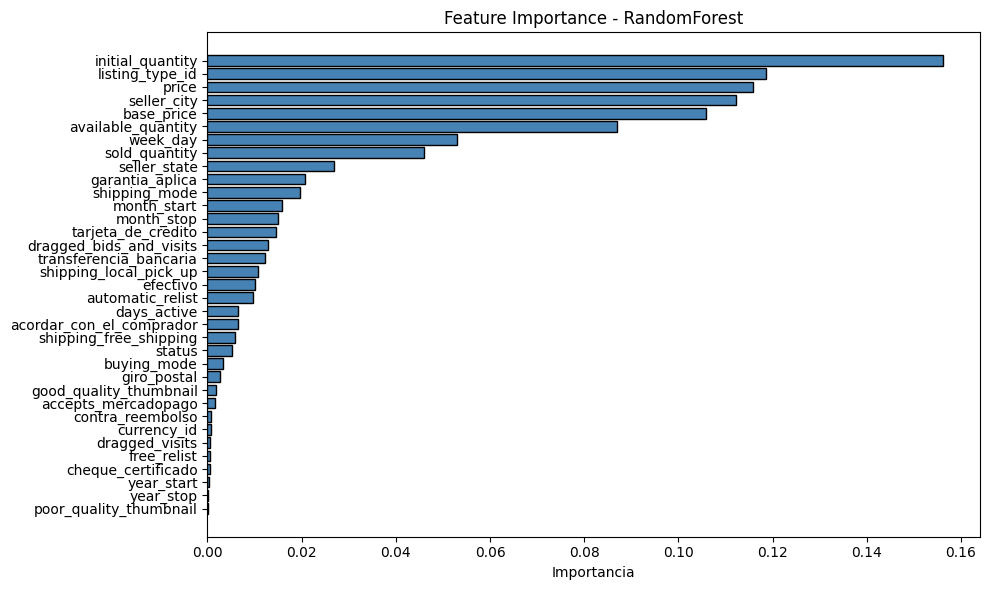

In [ ]:
# 5. Visualizar importancias
importances = rf.feature_importances_ # Extrae el array de importancias del modelo entrenado
sorted_idx = np.argsort(importances) # Índices que ordenarían las importancias

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], color='steelblue', edgecolor='black') # Posiciones
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx]) # Importancias de menor a mayor
plt.xlabel('Importancia')
plt.title('Feature Importance - RandomForest')
plt.tight_layout()
plt.show()

In [158]:
data.shape

(100000, 36)

In [156]:
# DataFrame con importancias
df_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Calcular importancia acumulada
df_importance['Cumulative'] = df_importance['Importance'].cumsum()
df_importance['% Cumulative'] = (df_importance['Cumulative'] / df_importance['Importance'].sum()) * 100

df_importance

,Feature,Importance,Cumulative,% Cumulative
8,initial_quantity,0.156237,0.156237,15.623661
1,listing_type_id,0.118564,0.274800,27.480047
2,price,0.115878,0.390678,39.067835
12,seller_city,0.112155,0.502833,50.283341
0,base_price,0.105853,0.608687,60.868678
10,available_quantity,0.086916,0.695603,69.560318
33,week_day,0.052980,0.748584,74.858358
9,sold_quantity,0.046025,0.794609,79.460903
11,seller_state,0.026885,0.821494,82.149416
28,garantia_aplica,0.020679,0.842173,84.217298


In [159]:
# Seleccionemos las 14 features que abarcan cerca del 90% de la importancia acumulada

threshold = 90
n_features = (df_importance['% Cumulative'] >= threshold).idxmax() + 1

print(f"Seleccionamos {n_features} features que capturan {threshold}% de importancia")
selected_features = df_importance.head(n_features)['Feature'].tolist()
print(selected_features)

Seleccionamos 22 features que capturan 90% de importancia
['initial_quantity', 'listing_type_id', 'price', 'seller_city', 'base_price', 'available_quantity', 'week_day', 'sold_quantity', 'seller_state', 'garantia_aplica', 'shipping_mode', 'month_start', 'month_stop', 'tarjeta_de_credito', 'dragged_bids_and_visits', 'transferencia_bancaria', 'shipping_local_pick_up', 'efectivo', 'automatic_relist', 'days_active', 'acordar_con_el_comprador', 'shipping_free_shipping']


In [160]:
# Añadamos la variable objetivo a las columnas seleccionadas

cols_to_export = selected_features + ['condition']

In [167]:
# Ruta relativa al notebook
project_root = Path.cwd().parent
output_dir = project_root / 'data' / 'processed'
output_file = output_dir / 'data_model.parquet'

# Crear directorio
output_dir.mkdir(parents=True, exist_ok=True)

# Exportar
data[selected_features + ['condition']].to_parquet(output_file, index=False)

In [163]:
# Columnas booleanas que deben ser bool
bool_columns = ['tarjeta_de_credito', 'transferencia_bancaria', 'efectivo',
                'shipping_local_pick_up', 'shipping_free_shipping',
                'acordar_con_el_comprador', 'automatic_relist']

# Convertir a bool (solo las que existen en selected_features)
for col in bool_columns:
    if col in data.columns:
        data[col] = data[col].astype(bool)

In [168]:
# Convertir todas las columnas categóricas a int
cat_cols = data.select_dtypes(include=['category', 'object']).columns.tolist()

# Excluir condition temporalmente
if 'condition' in cat_cols:
    cat_cols.remove('condition')

# Encodear categóricas
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col]).astype('int')

# Encodear variable objetivo
if 'condition' in data.columns:
    le_target = LabelEncoder()
    data['condition'] = le_target.fit_transform(data['condition']).astype('int')

# Verificar que todo es numérico
print(data[selected_features + ['condition']].dtypes)

initial_quantity              int64
listing_type_id               int64
price                       float64
seller_city                   int64
base_price                  float64
available_quantity            int64
week_day                      int64
sold_quantity               float64
seller_state                  int64
garantia_aplica               int64
shipping_mode                 int64
month_start                   int64
month_stop                    int64
tarjeta_de_credito             bool
dragged_bids_and_visits     float64
transferencia_bancaria         bool
shipping_local_pick_up         bool
efectivo                       bool
automatic_relist               bool
days_active                   int64
acordar_con_el_comprador       bool
shipping_free_shipping         bool
condition                     int64
dtype: object


In [169]:
# Ruta relativa al notebook
project_root = Path.cwd().parent
output_dir = project_root / 'data' / 'processed'
output_file = output_dir / 'data_model.parquet'

# Crear directorio
output_dir.mkdir(parents=True, exist_ok=True)

# Exportar
data[selected_features + ['condition']].to_parquet(output_file, index=False)